Random Forest
1.0
0.9
[[6 0 0 0 0]
 [0 6 0 0 0]
 [1 0 5 0 0]
 [0 2 0 4 0]
 [0 0 0 0 6]]
0.8978621378621379
Decision Tree
1.0
1.0
[[6 0 0 0 0]
 [0 6 0 0 0]
 [0 0 6 0 0]
 [0 0 0 6 0]
 [0 0 0 0 6]]
1.0
GaussianNB
1.0
0.43333333333333335
[[6 0 0 0 0]
 [0 0 2 3 1]
 [3 0 2 1 0]
 [0 1 2 2 1]
 [0 1 0 2 3]]
0.39290043290043286
Logistic Regression
1.0
0.9333333333333333
[[6 0 0 0 0]
 [0 5 0 1 0]
 [0 0 6 0 0]
 [0 1 0 5 0]
 [0 0 0 0 6]]
0.9333333333333333
           Actual     Predicted
133       Neutral         Hyped
109  Dead Fixture  Dead Fixture
59          Hyped         Hyped
80   Dead Fixture  Dead Fixture
7     Ultra Hyped   Ultra Hyped
104   Low Tension   Low Tension
140       Neutral       Neutral
95        Neutral         Hyped
118   Ultra Hyped   Ultra Hyped
84   Dead Fixture  Dead Fixture
33    Ultra Hyped   Ultra Hyped
44          Hyped         Hyped
54        Neutral       Neutral
24    Low Tension  Dead Fixture
37    Ultra Hyped   Ultra Hyped
132         Hyped         Hyped
111  Dea

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


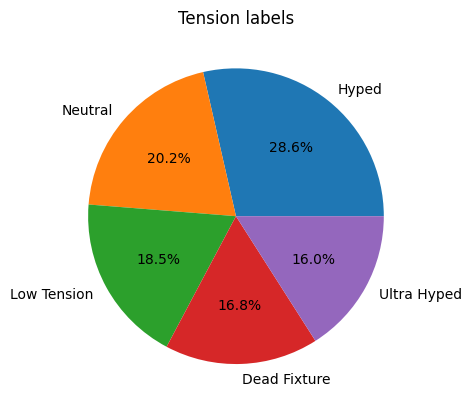

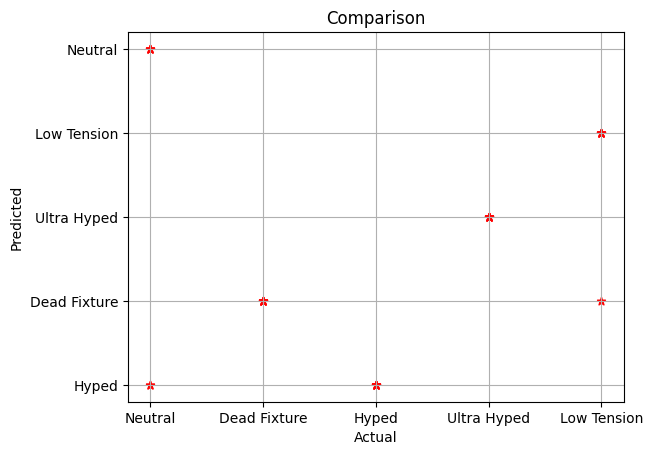

Label
Hyped           34
Neutral         24
Low Tension     22
Dead Fixture    20
Ultra Hyped     19
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv('Tension_labels.csv')
df.head()

y = df['Label']
X = df.drop('Label', axis=1)

# One-hot encode the categorical features
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

nb = GaussianNB()
nb.fit(X_train, y_train)

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

y_dt_train_pred = dt.predict(X_train)
y_dt_test_pred = dt.predict(X_test)

y_nb_train_pred = nb.predict(X_train)
y_nb_test_pred = nb.predict(X_test)

y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

print('Random Forest')
print(accuracy_score(y_train, y_rf_train_pred))
print(accuracy_score(y_test, y_rf_test_pred))
cm = confusion_matrix(y_test, y_rf_test_pred)
print(cm)
print(f1_score(y_test, y_rf_test_pred, average='weighted'))

print('Decision Tree')
print(accuracy_score(y_train, y_dt_train_pred))
print(accuracy_score(y_test, y_dt_test_pred))
cm = confusion_matrix(y_test, y_dt_test_pred)
print(cm)
print(f1_score(y_test, y_dt_test_pred, average='weighted'))

print('GaussianNB')
print(accuracy_score(y_train, y_nb_train_pred))
print(accuracy_score(y_test, y_nb_test_pred))
cm = confusion_matrix(y_test, y_nb_test_pred)
print(cm)
print(f1_score(y_test, y_nb_test_pred, average='weighted'))

print('Logistic Regression')
print(accuracy_score(y_train, y_lr_train_pred))
print(accuracy_score(y_test, y_lr_test_pred))
cm = confusion_matrix(y_test, y_lr_test_pred)
print(cm)
print(f1_score(y_test, y_lr_test_pred, average='weighted'))

comparison_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_test_pred})
comparison_dt_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_dt_test_pred})
comparison_nb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_nb_test_pred})
comparison_lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_lr_test_pred})


print(comparison_rf_df)
print(comparison_dt_df)
print(comparison_nb_df)
print(comparison_lr_df)

'''plt.imshow(X_test, cmap='Reds')
plt.colorbar()
plt.title('Intensity of attributes')
plt.show()'''

plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title('Tension labels')
plt.grid()
plt.show()

plt.scatter(y_test, y_rf_test_pred, color='red', marker='*')
plt.title('Comparison')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.show()
print(y_train.value_counts())